<a href="https://colab.research.google.com/github/pranay8297/deep-learning-projects/blob/master/l7_revision_jul_1_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastai==1.0.61

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 239 kB 14.6 MB/s 
     |████████████████████████████████| 332 kB 78.6 MB/s 
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19190 sha256=d8d468f2c7212975fddc47ed89a741f425f38897b01c9c8b5ccd73e9f4e133e5
  Stored in directory: /root/.cache/pip/wheels/df/99/da/c34f202dc8fd1dffd35e0ecf1a7d7f8374ca05fbcbaf974b83
Successfully built nvidia-ml-py3
  Attempting uninstall: fastai
    Found existing installation: fastai 2.6.3
    Uninstalling fastai-2.6.3:
      Successfully uninstalled fastai-2.6.3


In [2]:
!pip install ipdb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 13.6 MB/s 
     |████████████████████████████████| 381 kB 77.1 MB/s 
  Created wheel for ipdb: filename=ipdb-0.13.9-py3-none-any.whl size=11648 sha256=58ab9dddf112ae2e84f1895d238fcdcf778a9f3a33281aa55928a62fda802c84
  Stored in directory: /root/.cache/pip/wheels/65/cd/cc/aaf92acae337a28fdd2aa4d632196a59745c8c39f76eaeed01
Successfully built ipdb
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency 

In [3]:
from fastai import *
from fastai.vision import *
from ipdb import set_trace as st

In [4]:
from fastai.datasets import untar_data
path = untar_data(URLs.PETS)
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [5]:
path_img = path/'images'
path_img.ls()[4203]

PosixPath('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_58.jpg')

In [6]:
path_img.ls()[4203].stem.rsplit('_', 1)[0]

'shiba_inu'

In [7]:
from fastai.vision.data import ImageList
def get_name(im_path):
  return im_path.stem.rsplit('_', 1)[0]

src = ImageList.from_folder(path/'images').split_by_rand_pct(0.2).label_from_func(get_name)


In [8]:
from fastai.vision.transform import get_transforms
data = src.transform(get_transforms(), size = 96).databunch(bs = 64).normalize(imagenet_stats)

/usr/local/lib/python3.7/dist-packages/fastai/vision/transform.py:247: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:859.)
  return _solve_func(B,A)[0][:,0]


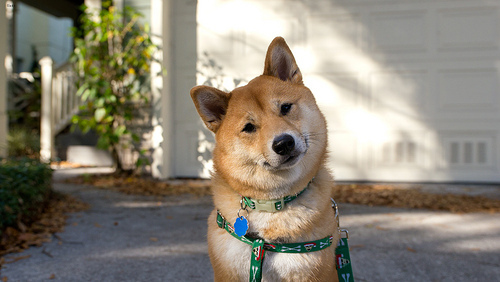

In [9]:
image = open_image(path_img.ls()[4203])
image

In [10]:
image.shape

torch.Size([3, 282, 500])

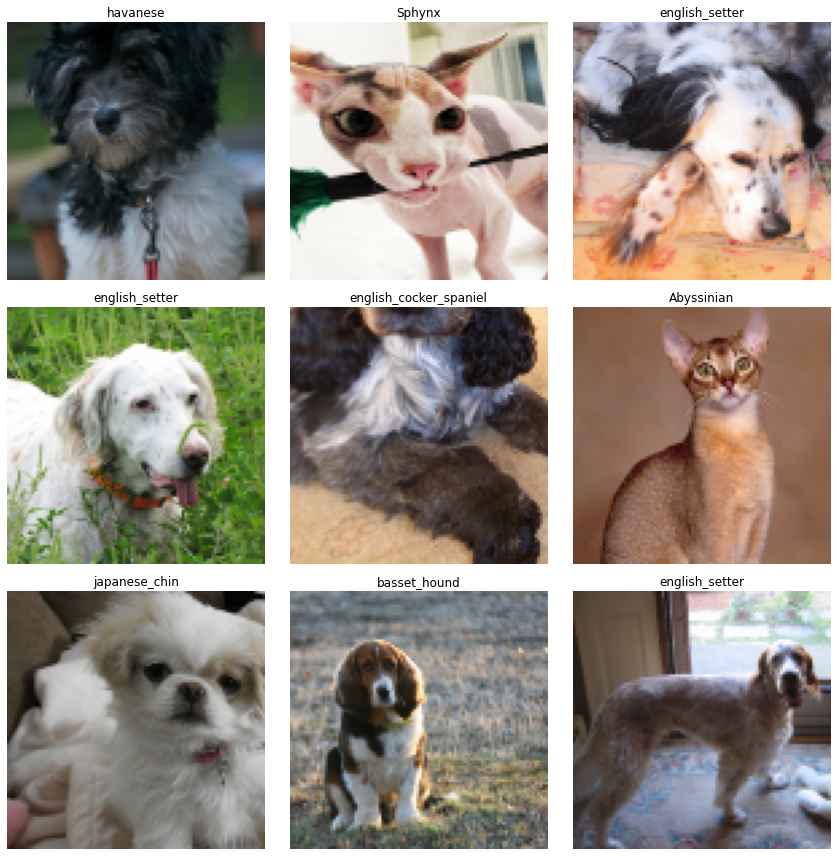

In [11]:
data.show_batch(rows = 3)

In [12]:
from fastai.metrics import accuracy
from fastai.vision.learner import cnn_learner
learn = cnn_learner(data, models.resnet34, metrics = accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [13]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


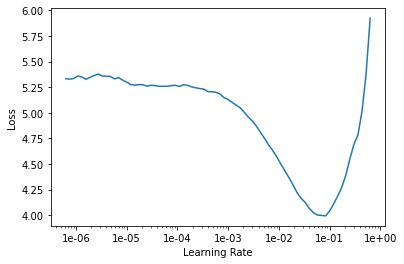

In [14]:
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(4, max_lr = 6e-03)

epoch,train_loss,valid_loss,accuracy,time
0,2.192153,1.273893,0.652909,00:16
1,1.447030,0.999444,0.714479,00:16
2,1.046569,0.721506,0.768606,00:16
3,0.799332,0.635300,0.797700,00:16


In [16]:
learn.save('st_1')
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


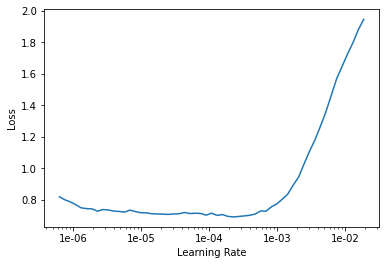

In [17]:
learn.lr_find()
learn.recorder.plot()

In [18]:
learn.load('st_1')
learn.fit_one_cycle(5, max_lr = 4e-04)
learn.save('st_2')

epoch,train_loss,valid_loss,accuracy,time
0,0.880067,1.355979,0.638024,00:17
1,1.213678,1.224323,0.642084,00:16
2,0.956170,1.021257,0.721245,00:16
3,0.620196,0.624759,0.803789,00:16
4,0.437564,0.575422,0.825440,00:16


In [19]:
learn.load('st_2')
learn.fit_one_cycle(5, max_lr = 2e-04)

epoch,train_loss,valid_loss,accuracy,time
0,0.360790,0.708491,0.803789,00:16
1,0.516402,0.843498,0.755751,00:17
2,0.470573,0.682089,0.807172,00:16
3,0.309909,0.576657,0.832882,00:16
4,0.234448,0.561762,0.829499,00:16


In [20]:
learn.save('st_3')

In [21]:
data_160 = src.transform(get_transforms(), size = 160).databunch(bs = 64).normalize(imagenet_stats)

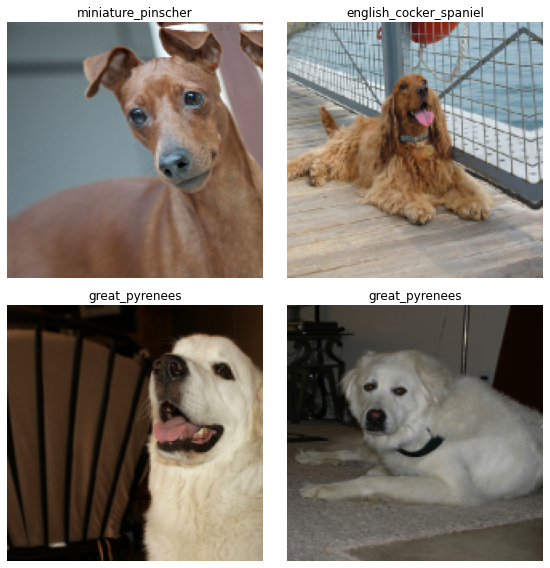

In [22]:
data_160.show_batch(rows = 2)

In [23]:
learn.freeze()
learn.data = data_160

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


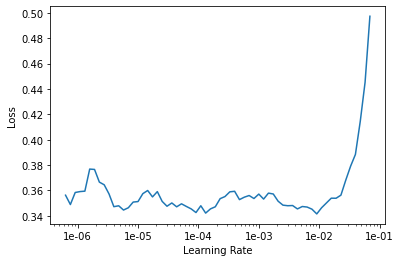

In [24]:
learn.load('st_3')
learn.lr_find()
learn.recorder.plot()

In [25]:
learn.load('st_3')
learn.fit_one_cycle(4, max_lr = 1e-03)

epoch,train_loss,valid_loss,accuracy,time
0,0.313215,0.355491,0.891746,00:22
1,0.265083,0.349567,0.893099,00:21
2,0.204208,0.325528,0.905277,00:22
3,0.184391,0.318455,0.904601,00:22


In [26]:
learn.save('st_4')
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


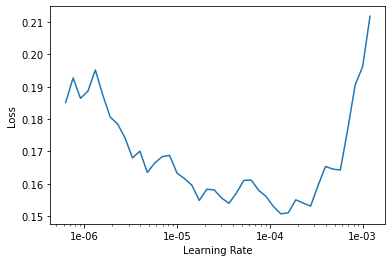

In [27]:
learn.load('st_4')
learn.lr_find()
learn.recorder.plot()

In [28]:
learn.load('st_4')
learn.fit_one_cycle(5, max_lr = 1e-04)

epoch,train_loss,valid_loss,accuracy,time
0,0.173606,0.362006,0.897158,00:22
1,0.217373,0.436164,0.877537,00:22
2,0.181537,0.360639,0.902571,00:22
3,0.124632,0.321170,0.903924,00:22
4,0.086540,0.316047,0.905954,00:22


(None, None)

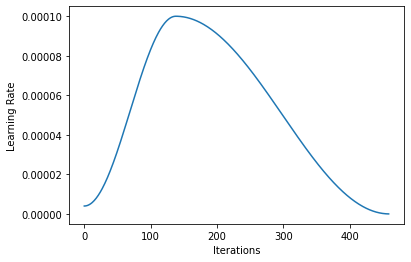

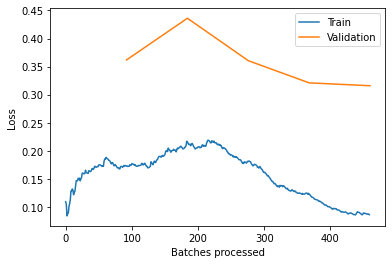

In [29]:
learn.recorder.plot_lr(), learn.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


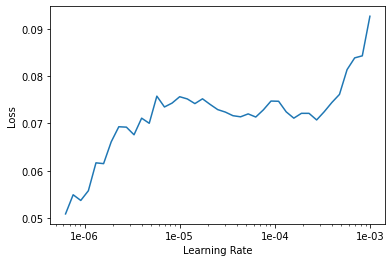

In [30]:
learn.save('st_5')
learn.lr_find()
learn.recorder.plot()

In [31]:
learn.load('st_5')
learn.fit_one_cycle(5, max_lr = 2e-05)

epoch,train_loss,valid_loss,accuracy,time
0,0.077326,0.315371,0.907984,00:22
1,0.072942,0.312055,0.913396,00:21
2,0.069929,0.322058,0.916103,00:22
3,0.058054,0.324908,0.910690,00:22
4,0.065423,0.323280,0.906631,00:22


In [32]:
learn.save('st_6')


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


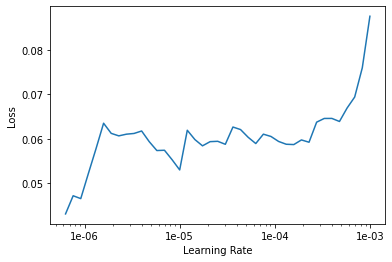

In [33]:
learn.load('st_6')
learn.lr_find()
learn.recorder.plot()

In [34]:
data_224 = src.transform(get_transforms(), size = 224).databunch(bs = 64).normalize(imagenet_stats)

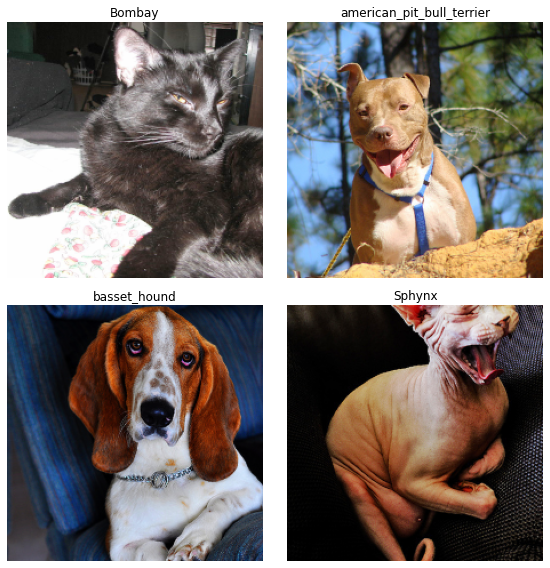

In [35]:
data_224.show_batch(rows = 2)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


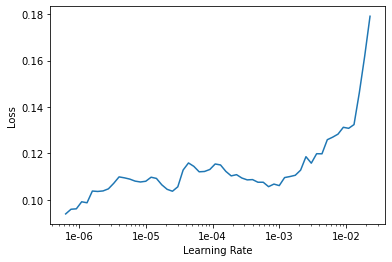

In [36]:
learn.load('st_6')
learn.data = data_224
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.load('st_6')
learn.fit_one_cycle(4, max_lr = 5e-03 )

In [ ]:
learn.save('st_7')
# learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


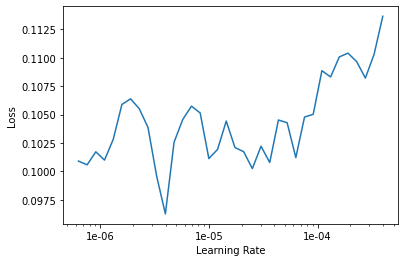

In [39]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.load('st_7')
learn.fit_one_cycle(5, max_lr = 5e-05)

In [ ]:
learn.save('st_8')

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.load('st_8')
learn.fit_one_cycle(5, max_lr = 3e-06)

epoch,train_loss,valid_loss,accuracy,time
0,0.052654,0.324798,0.921516,00:20
1,0.054121,0.320304,0.922869,00:20
2,0.049503,0.321795,0.920162,00:20


epoch,train_loss,valid_loss,accuracy,time
0,0.052654,0.324798,0.921516,00:20
1,0.054121,0.320304,0.922869,00:20
2,0.049503,0.321795,0.920162,00:20
3,0.053513,0.318621,0.921516,00:20


In [44]:
learn.save('st_9')

In [60]:
x, y = data.one_batch()
x, y = x.cuda(), y.cuda()
x.shape, y.shape


(torch.Size([64, 3, 224, 224]), torch.Size([64]))

In [109]:
class AdaptiveAvgPool2dFlatten(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer = nn.AdaptiveAvgPool2d((1))
  
  def forward(self, x_in):
    return self.layer(x_in).flatten(1)

In [119]:
model = nn.Sequential(
      nn.Conv2d(3, 64, kernel_size = 8, stride = 2, padding = 3, padding_mode='reflect'),
      nn.ReLU(),
      nn.Conv2d(64, 128, kernel_size = 3, stride = 1, padding = 1, padding_mode='reflect'),
      nn.ReLU(),
      nn.Conv2d(128, 256, kernel_size = 3, stride = 2, padding = 1, padding_mode='reflect'),
      nn.ReLU(),
      nn.Conv2d(256, 256, kernel_size = 3, stride = 1, padding = 1, padding_mode='reflect'),
      nn.ReLU(),
      nn.Conv2d(256, 512, kernel_size = 3, stride = 2, padding = 1, padding_mode='reflect'),
      nn.ReLU(),
      nn.Conv2d(512, 512, kernel_size = 3, stride = 1, padding = 1, padding_mode='reflect'),
      nn.ReLU(),
      nn.Conv2d(512, 1024, kernel_size = 3, stride = 2, padding = 1, padding_mode='reflect'),
      nn.ReLU(),
      AdaptiveAvgPool2dFlatten(),
      nn.Linear(1024, 2048),
      nn.ReLU(),
      nn.Linear(2048, 512),
      nn.ReLU(),
      nn.Linear(512, data.c)
    ).cuda()

In [120]:
yhat = model(x)
yhat.shape

torch.Size([64, 37])

In [122]:
from fastai.basic_train import Learner
my_learner = Learner(data = data_224, model = model, loss_func = nn.CrossEntropyLoss(), metrics = accuracy)

In [123]:
my_learner.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


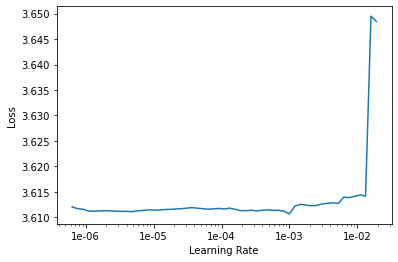

In [124]:
my_learner.recorder.plot()

In [125]:
my_learner.fit_one_cycle(10, max_lr = 1e-03)

epoch,train_loss,valid_loss,accuracy,time
0,3.601742,3.588794,0.043302,00:23
1,3.577590,3.554527,0.039919,00:23
2,3.565666,3.527310,0.041949,00:23
3,3.537649,3.498248,0.043978,00:23
4,3.508105,3.494535,0.042625,00:23
5,3.491650,3.473446,0.041272,00:23
6,3.464877,3.438648,0.048038,00:23
7,3.424621,3.397045,0.054804,00:23
8,3.392125,3.378262,0.055480,00:23
9,3.374698,3.372787,0.056834,00:22


In [ ]:
# test = nn.Conv2d(10,5,2)
# test.weight == nn.init.kaiming_normal_(test.weight, mode = 'fan_in')

In [143]:
def get_conv_layer(ni, no, stride = 2, kernel_size = 3):
  padding = int(kernel_size/2)
  return nn.Sequential(
      nn.Conv2d(ni, no, kernel_size = kernel_size, stride = stride, padding = padding, padding_mode = 'reflect'),
      nn.BatchNorm2d(no),
      nn.ReLU()
  )

In [153]:
model_2 = nn.Sequential(
      get_conv_layer(3, 64, stride = 2, kernel_size = 7),
      get_conv_layer(64, 64, stride = 1, kernel_size = 3),
      get_conv_layer(64, 128, stride = 2, kernel_size = 3),
      get_conv_layer(128, 128, stride = 1, kernel_size = 3),
      get_conv_layer(128, 256, stride = 2, kernel_size = 3),
      get_conv_layer(256, 256, stride = 1, kernel_size = 3),
      get_conv_layer(256, 512, stride = 2, kernel_size = 3),
      get_conv_layer(512, 1024, stride = 2, kernel_size = 3),
      AdaptiveAvgPool2dFlatten(),
      nn.BatchNorm1d(1024),
      nn.Linear(1024, 512),
      nn.ReLU(),
      nn.BatchNorm1d(512),
      nn.Linear(512, data.c),
      nn.ReLU(),
      nn.BatchNorm1d(data.c)
    ).cuda()

In [154]:
yhat = model_2(x)
yhat.shape

torch.Size([64, 37])

In [158]:
from fastai.torch_core import AdamW
my_learner = Learner(data = data_224, model = model_2, opt_func = AdamW, wd = 0.1, metrics = accuracy, loss_func = nn.CrossEntropyLoss())

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


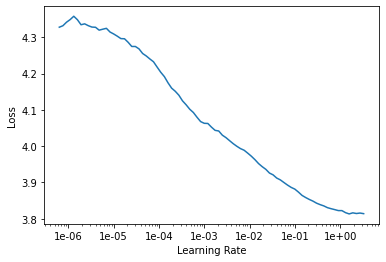

In [159]:
my_learner.lr_find()
my_learner.recorder.plot()

In [160]:
my_learner.fit_one_cycle(3, max_lr = 1e-03)

epoch,train_loss,valid_loss,accuracy,time
0,3.598045,3.532454,0.071042,00:21
1,3.435097,3.337924,0.110961,00:22
2,3.232433,3.135506,0.148173,00:21


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


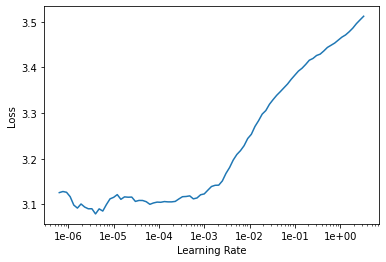

In [161]:
my_learner.lr_find()
my_learner.recorder.plot()

In [162]:
my_learner.save('mst_1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


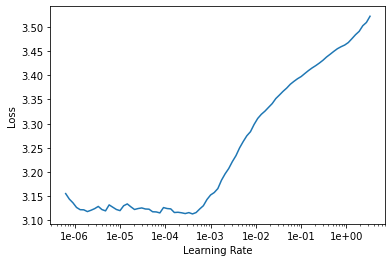

In [163]:
my_learner.load('mst_1')
my_learner.freeze_to(-3)
my_learner.lr_find()
my_learner.recorder.plot()

In [164]:
my_learner.load('mst_1')
my_learner.fit_one_cycle(3, max_lr = 8e-04)

epoch,train_loss,valid_loss,accuracy,time
0,3.293732,4.313064,0.056157,00:20
1,3.157428,3.172996,0.152233,00:20
2,2.855840,2.722404,0.240866,00:21


In [165]:
my_learner.save('mst_2')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


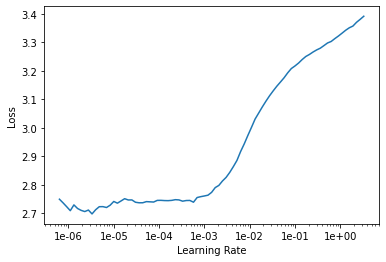

In [166]:
my_learner.load('mst_2')
my_learner.unfreeze()
my_learner.lr_find()
my_learner.recorder.plot()

In [167]:
my_learner.load('mst_2')
my_learner.fit_one_cycle(5, max_lr = 4e-04)

epoch,train_loss,valid_loss,accuracy,time
0,2.710942,3.267562,0.138024,00:20
1,2.755535,4.109724,0.104195,00:21
2,2.596605,2.710177,0.238836,00:20
3,2.374094,2.340010,0.355210,00:20
4,2.218646,2.174867,0.405277,00:21


In [168]:
my_learner.save('mst_3')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


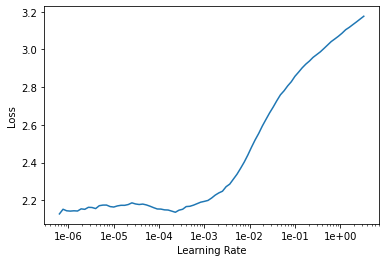

In [169]:
my_learner.load('mst_3')
my_learner.lr_find()
my_learner.recorder.plot()

In [170]:
my_learner.load('mst_3')
my_learner.fit_one_cycle(10, max_lr = 4e-04)

epoch,train_loss,valid_loss,accuracy,time
0,2.162531,2.626267,0.278755,00:20
1,2.247367,2.871909,0.209066,00:20
2,2.308322,2.598499,0.269283,00:20
3,2.257189,2.557137,0.292963,00:20
4,2.111357,2.860620,0.232070,00:20
5,2.001853,2.158588,0.393099,00:20
6,1.861332,2.716260,0.271989,00:20
7,1.718832,1.892726,0.462111,00:20
8,1.613791,1.582390,0.573072,00:21
9,1.539703,1.553343,0.592693,00:20


In [173]:
my_learner.save('mst_4')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


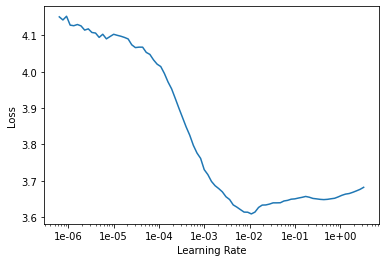

In [174]:
my_learner.load('mst_4')
my_learner.lr_find()
my_learner.recorder.plot()

In [176]:
my_learner.load('mst_4')
my_learner.fit_one_cycle(10, max_lr = 1e-02)

epoch,train_loss,valid_loss,accuracy,time
0,2.941210,4.815430,0.099459,00:20
1,2.870169,8.207967,0.037889,00:20
2,2.743382,6.694170,0.054804,00:20
3,2.538820,4.303635,0.135318,00:20
4,2.344578,4.338921,0.138024,00:20
5,2.103376,2.530734,0.290934,00:20
6,1.877072,2.372554,0.335589,00:21
7,1.612304,1.688868,0.507442,00:20
8,1.396257,1.219870,0.661028,00:20
9,1.258420,1.159736,0.675237,00:20


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


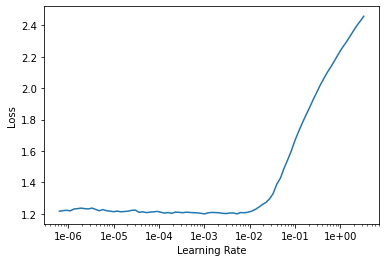

In [177]:
my_learner.save('mst_5')
my_learner.lr_find()
my_learner.recorder.plot()

In [178]:
my_learner.load('mst_5')
my_learner.fit_one_cycle(10, 1e-03)

epoch,train_loss,valid_loss,accuracy,time
0,1.199258,1.152132,0.676590,00:21
1,1.228567,1.359471,0.620433,00:20
2,1.222106,1.240149,0.654263,00:20
3,1.188342,1.182749,0.673884,00:20
4,1.151629,1.152626,0.668471,00:20
5,1.072611,1.067668,0.694858,00:20
6,1.003411,1.034230,0.710419,00:20
7,0.961241,0.973199,0.723275,00:20
8,0.916940,0.958334,0.730717,00:20
9,0.910773,0.959901,0.725304,00:20


In [179]:
my_learner.save('mst_6')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


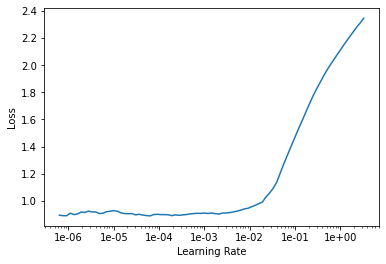

In [180]:
my_learner.save('mst_6')
my_learner.lr_find()
my_learner.recorder.plot()

In [181]:
my_learner.load('mst_6')
my_learner.fit_one_cycle(10, max_lr = 5e-04)

epoch,train_loss,valid_loss,accuracy,time
0,0.874590,0.959930,0.731394,00:20
1,0.895589,0.998836,0.723275,00:20
2,0.924353,1.007142,0.712449,00:20
3,0.892903,0.986131,0.723951,00:20
4,0.890900,0.978898,0.719215,00:20
5,0.847441,0.955751,0.734777,00:20
6,0.814781,0.952136,0.725304,00:21
7,0.808866,0.934144,0.745602,00:20
8,0.764381,0.921156,0.744249,00:20
9,0.756681,0.923558,0.738160,00:20


In [182]:
my_learner.save('mst_7')

In [183]:
my_learner.load('mst_7')
my_learner.fit_one_cycle(1, max_lr = 3e-03)

epoch,train_loss,valid_loss,accuracy,time
0,1.104037,1.068750,0.692152,00:21


In [184]:
my_learner.save('mst_8')

In [185]:
my_learner.load('mst_8')
my_learner.fit_one_cycle(10, max_lr = 5e-04)

epoch,train_loss,valid_loss,accuracy,time
0,0.974371,0.993146,0.719215,00:20
1,0.900036,0.979514,0.721245,00:20
2,0.874355,0.960912,0.735453,00:20
3,0.842274,0.976975,0.730717,00:20
4,0.813843,0.929975,0.742219,00:20
5,0.764908,0.899438,0.740866,00:20
6,0.723208,0.896056,0.742896,00:21
7,0.691687,0.864107,0.757104,00:20
8,0.673523,0.859590,0.760487,00:20
9,0.664927,0.863835,0.755074,00:20


In [186]:
my_learner.save('mst_9')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


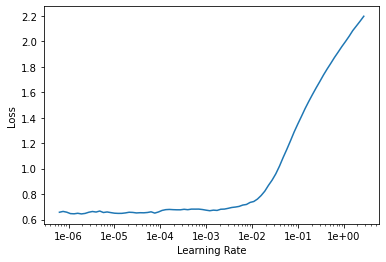

In [187]:
my_learner.lr_find()
my_learner.recorder.plot()

In [188]:
class ConvRes(nn.Module):
  def __init__(self, ni, no, stride = 2, kernel_size = 3):
    super().__init__()
    self.layer = get_conv_layer(ni, no, stride, kernel_size)
    self.c1 = get_conv_layer(no, no, stride = 1)
    self.c2 = get_conv_layer(no, no, stride = 1)

  def forward(self, x):
    out = self.layer(x)
    return out + self.c2(self.c1(out))

In [193]:
res_model = nn.Sequential(
      # get_conv_layer(3, 64, stride = 2, kernel_size = 7),
      ConvRes(3, 64, stride = 2, kernel_size = 7),
      ConvRes(64, 128, stride = 2, kernel_size = 3),
      ConvRes(128, 256, stride = 2, kernel_size = 3),
      ConvRes(256, 512, stride = 2, kernel_size = 3),
      ConvRes(512, 1024, stride = 2, kernel_size = 3),
      AdaptiveAvgPool2dFlatten(),
      nn.BatchNorm1d(1024),
      nn.Linear(1024, 512),
      nn.ReLU(),
      nn.BatchNorm1d(512),
      nn.Linear(512, data.c),
      nn.ReLU(),
      nn.BatchNorm1d(data.c)
    ).cuda()

In [194]:
yhat = res_model(x)
yhat.shape

torch.Size([64, 37])

In [196]:
res_learner = Learner(data_224, model = res_model, opt_func = AdamW, loss_func= nn.CrossEntropyLoss(), wd = 0.1, metrics = accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


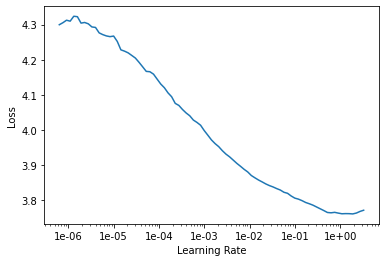

In [197]:
res_learner.lr_find()
res_learner.recorder.plot()

In [198]:
res_learner.fit_one_cycle(10, max_lr = 1e-03)

epoch,train_loss,valid_loss,accuracy,time
0,3.645468,3.592760,0.081191,00:22
1,3.490828,3.763030,0.042625,00:22
2,3.410356,3.614632,0.061570,00:22
3,3.318342,3.315577,0.115020,00:22
4,3.192742,3.816442,0.080514,00:22
5,3.013797,3.140968,0.156969,00:22
6,2.828957,2.769109,0.228687,00:22
7,2.616507,2.615142,0.276725,00:21
8,2.421277,2.322304,0.348444,00:22
9,2.313569,2.263216,0.366035,00:22


In [199]:
res_learner.save('rst_1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


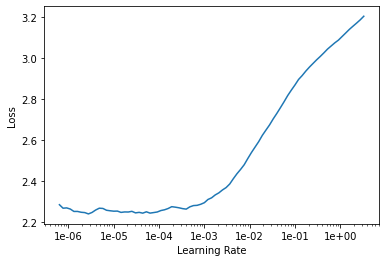

In [201]:
res_learner.lr_find()
res_learner.recorder.plot()

In [202]:
res_learner.load('rst_1')
res_learner.fit_one_cycle(15, max_lr = 4e-04)

epoch,train_loss,valid_loss,accuracy,time
0,2.259838,2.243630,0.379567,00:22
1,2.280307,2.499879,0.291610,00:22
2,2.288313,2.696121,0.258457,00:22
3,2.287799,2.522522,0.286198,00:22
4,2.206750,2.760183,0.251015,00:22
5,2.114588,2.426051,0.318674,00:22
6,1.977934,2.096690,0.399865,00:22
7,1.845037,2.133399,0.407307,00:22
8,1.713129,1.694973,0.537889,00:21
9,1.597157,1.913769,0.458728,00:21


In [203]:
res_learner.save('rst_2')
res_learner.freeze_to(-6)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


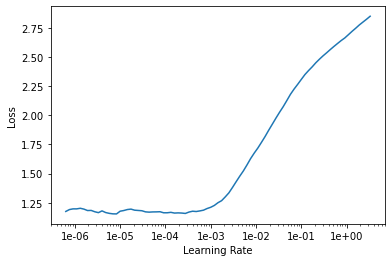

In [204]:
res_learner.lr_find()
res_learner.recorder.plot()

In [206]:
res_learner.load('rst_2')
res_learner.fit_one_cycle(5, max_lr = 2e-04)

epoch,train_loss,valid_loss,accuracy,time
0,1.207594,1.418642,0.622463,00:21
1,1.317913,1.465434,0.596752,00:22
2,1.257556,1.359174,0.625846,00:22
3,1.144995,1.181149,0.678620,00:21
4,1.049046,1.130895,0.690122,00:22


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


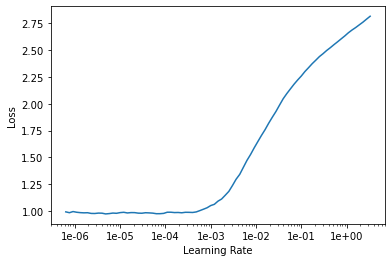

In [207]:
res_learner.save('rst_3')
res_learner.unfreeze()
res_learner.lr_find()
res_learner.recorder.plot()

In [209]:
res_learner.load('rst_3')
res_learner.fit_one_cycle(25, max_lr = 2e-04)

epoch,train_loss,valid_loss,accuracy,time
0,1.026126,1.121836,0.700271,00:22
1,1.006938,1.150969,0.679296,00:21
2,1.014793,1.179162,0.675913,00:22
3,1.038539,1.358681,0.633288,00:21
4,1.069119,1.530918,0.583221,00:21
5,1.094213,1.580748,0.573072,00:21
6,1.083551,1.652704,0.556157,00:22
7,1.100258,2.260831,0.412043,00:21
8,1.034636,1.393239,0.616373,00:21
9,1.025395,1.703068,0.522327,00:21
